In [2]:
import cv2
import numpy as np

In [3]:
im_name = "frame.jpg"
img = cv2.imread(im_name)

In [4]:
import matplotlib.pyplot as plt
# %matplotlib inline  

def showImage(img) :
    fig = plt.figure()
    ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax1.set_title(im_name)
    plt.imshow(img)


showImage(img)

### Image Enhancement

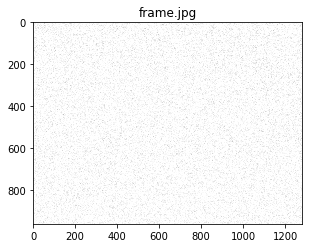

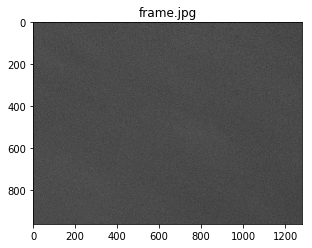

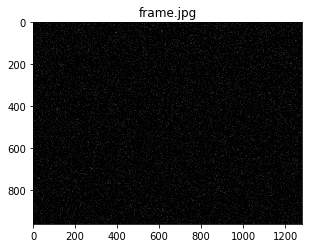

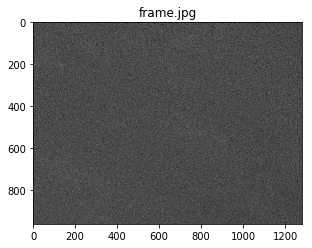

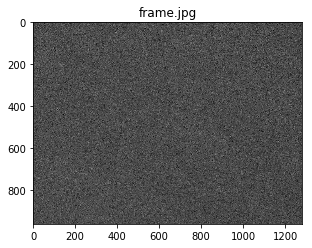

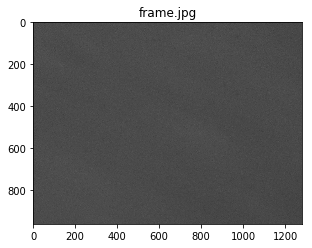

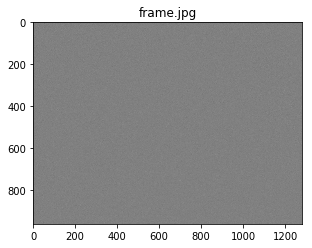

In [5]:
from PIL import Image
from PIL import ImageFilter

im = Image.fromarray(img)

im1 = im.filter(ImageFilter.CONTOUR)
im2 = im.filter(ImageFilter.SHARPEN)
im3 = im.filter(ImageFilter.FIND_EDGES)
im4 = im.filter(ImageFilter.EDGE_ENHANCE)
im5 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
im6 = im.filter(ImageFilter.DETAIL)
im7 = im.filter(ImageFilter.EMBOSS)

showImage(im1)
showImage(im2)
showImage(im3)
showImage(im4)
showImage(im5)
showImage(im6)
showImage(im7)

### Fourier Transform

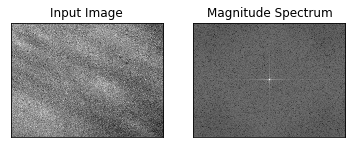

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('frame.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

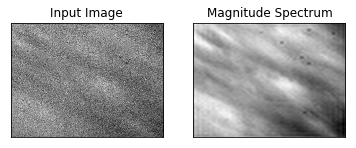

In [7]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### Coba

[[76 77 76 ... 68 71 72]
 [77 74 74 ... 73 73 73]
 [75 79 79 ... 73 71 71]
 ...
 [76 76 74 ... 72 73 69]
 [75 74 71 ... 73 72 68]
 [78 79 77 ... 70 72 72]]
63
87
223.21292
255.0


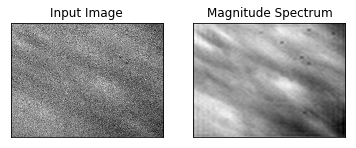

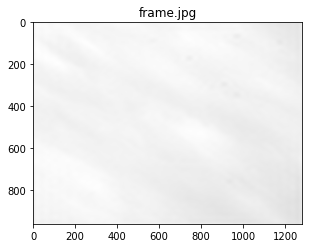

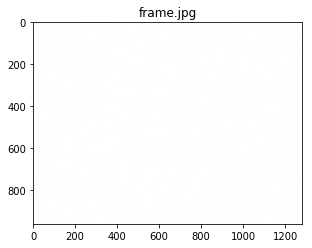

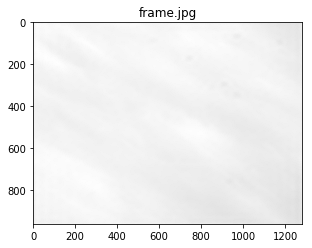

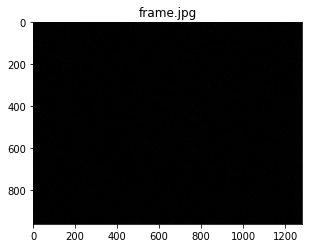

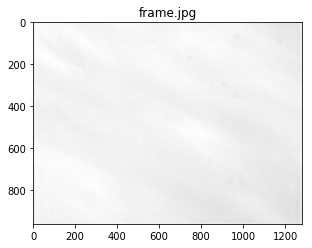

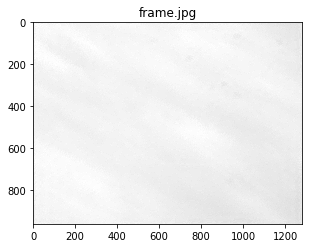

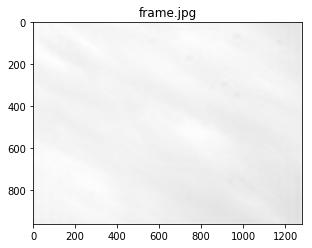

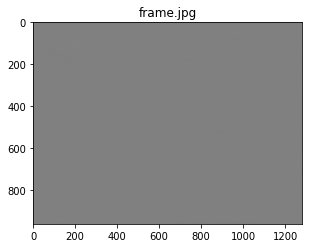

In [9]:
from PIL import Image
from PIL import ImageFilter

print(img)
print(img.min())
print(img.max())
print(img_back.min())
print(img_back.max())

## Convert back again
img_back = img_back.astype(np.float32) / img_back.max() # normalize the data to 0 - 1
img_back = 255 * img_back # Now scale by 255
coba = img_back.astype(np.uint8)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(coba, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()



im = Image.fromarray(coba)

im1 = im.filter(ImageFilter.CONTOUR)
im2 = im.filter(ImageFilter.SHARPEN)
im3 = im.filter(ImageFilter.FIND_EDGES)
im4 = im.filter(ImageFilter.EDGE_ENHANCE)
im5 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
im6 = im.filter(ImageFilter.DETAIL)
im7 = im.filter(ImageFilter.EMBOSS)

showImage(im)
showImage(im1)
showImage(im2)
showImage(im3)
showImage(im4)
showImage(im5)
showImage(im6)
showImage(im7)